<a href="https://colab.research.google.com/github/MedwillTech/MedwillTech/blob/main/Exercice3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Apprentissage supervisé par l'utilisation de différentes fonctions de coût

Dans cet exercice, nous examinerons plus en détail la façon dont les fonctions de coût peuvent changer :

la façon dont les modèles semblent s'adapter aux données
Les types de relations qu'un modèle représente

**Loading the data**

In [3]:
import pandas as pd
import requests as rq
url_regressor = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-dataset-regressor.csv'
response=rq.get(url_regressor)
with open('ml-dataset-regressor.csv','wb') as f:
    f.write(response.content)
url_weather="https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv"
response=rq.get(url_weather)
with open('seattleWeather_1948-2017.csv','wb') as f:
    f.write(response.content)

from datetime import datetime
# lecture de donnée de la temperature
df= pd.read_csv("seattleWeather_1948-2017.csv", parse_dates=["date"])

# Convertir les dates en nombres pour pouvoir les utiliser dans nos modèles
# Nous créons une colonne d'années qui peut contenir des fractions. Par exemple,
# 1948.5 correspond à la moitié de l'année 1948
df["year"] = [d.year + d.timetuple().tm_yday / 365.25 for d in df["date"]]
# Pour les besoins de cet exercice, examinons le 1er février pour les années suivantes :

desired_dates = [
    datetime(1950,2,1),
    datetime(1960,2,1),
    datetime(1970,2,1),
    datetime(1980,2,1),
    datetime(1990,2,1),
    datetime(2000,2,1),
    datetime(2010,2,1),
    datetime(2017,2,1),
]
df = df[df["date"].isin(desired_dates)]
df.head(10)

,date,amount_of_precipitation,max_temperature,min_temperature,rain,year
762,1950-02-01,0.00,27,1,False,1950.087611
4414,1960-02-01,0.15,52,44,True,1960.087611
8067,1970-02-01,0.00,50,42,False,1970.087611
11719,1980-02-01,0.37,54,36,True,1980.087611
15372,1990-02-01,0.08,45,37,True,1990.087611
19024,2000-02-01,1.34,49,41,True,2000.087611
22677,2010-02-01,0.08,49,40,True,2010.087611
25234,2017-02-01,0.00,43,29,False,2017.087611


In [9]:
from collections import Counter

counts_max_temp= Counter(df['max_temperature'])

for key, count in counts_max_temp.most_common(2000):
  print(f"max_temperature: {key}, frequence:{count}")


max_temperature: 49, frequence:2
max_temperature: 27, frequence:1
max_temperature: 52, frequence:1
max_temperature: 50, frequence:1
max_temperature: 54, frequence:1
max_temperature: 45, frequence:1
max_temperature: 43, frequence:1


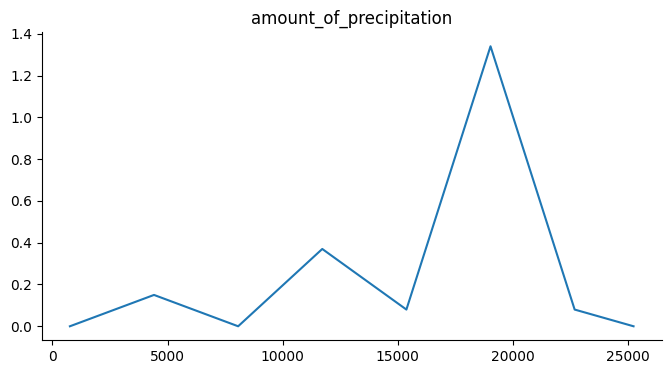

In [14]:
# @title amount_of_precipitation

from matplotlib import pyplot as plt
df['amount_of_precipitation'].plot(kind='line', figsize=(8, 4), title='amount_of_precipitation')
plt.gca().spines[['top', 'right']].set_visible(False)

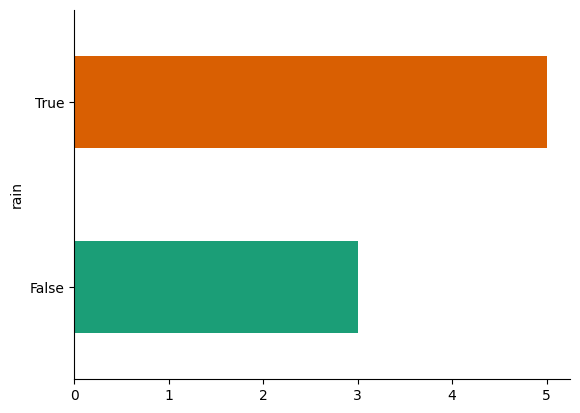

In [11]:
# @title rain

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('rain').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

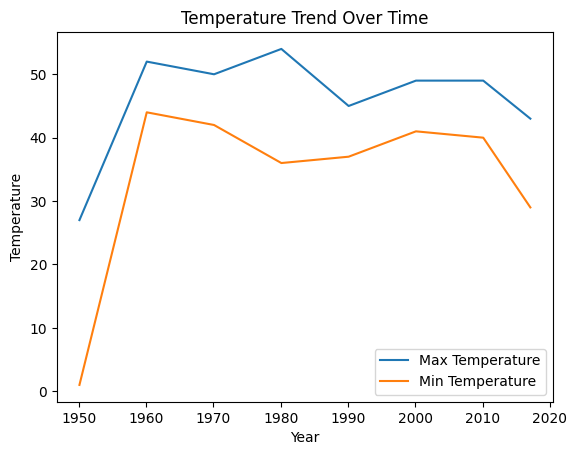

In [10]:
# @title Temperature Trend Over Time

import matplotlib.pyplot as plt

plt.plot(df['year'], df['max_temperature'], label='Max Temperature')
plt.plot(df['year'], df['min_temperature'], label='Min Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Trend Over Time')
_ = plt.legend()

In [31]:
# random.shuffle() --  réorganise aléatoirement les éléments d’une liste
# random.choice()--> choisir un élément au hasard dans une liste,
#random.sample() --> choisir au hasard un échantillon d’éléments sans remise
#random.seed(10) -->  pour obtenir le même résultat à chaque fois
#random.randrange()--> prend soit un argument, soit deux, et retourne un élément choisi aléatoirement dans la plage range()
# random.random()--> produit des nombres uniformément répartis entre0 et 1

import re
re_examples = [  # tous sont vrais car
               not re.match("a", "cat"),
               # 'cat' ne commence pas par 'a'
               re.search("a", "cat"),
               # 'cat' contient un 'a'
               not re.search("c", "dog"),
               # 'dog' ne contient pas de 'c'
               3 == len(re.split("[ab]", "carbs")),
               # se coupe en a ou b en ['c','r','s']
               "R-D-" == re.sub("[0-9]", "-", "R2D2")
               # remplace les chiffres par des tirets
               ]
assert all(re_examples), "all the regex examples should be True"

# module typing
# 1. Types génériques simples
# Utilisez les types de base : List, Tuple, Dict, Set, Optional
